# **Access data from kaggle**

In [ ]:
!pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sheroook","key":"02840f90001498510610d93321c345e1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
cd /content

/content


In [ ]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-20 10:47:51           6818  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-20 06:04:06           3083  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           3017  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            549  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 17.1MB/s]
100% 2.29G/2.29G [00:29<00:00, 83.1MB/s]


In [ ]:
from zipfile import ZipFile

file_name = "/content/chest-xray-pneumonia.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


# **Exploring data**

In [ ]:
import os
#TRAIN
PTrainList=os.listdir("/content/chest_xray/train/PNEUMONIA")
NTrainList=os.listdir("/content/chest_xray/train/NORMAL")
print("P",len(PTrainList))
print("N",len(NTrainList))

#VAL
PValList=os.listdir("/content/chest_xray/val/PNEUMONIA")
NValList=os.listdir("/content/chest_xray/val/NORMAL")
print("P",len(PValList))
print("N",len(NValList))

P 3875
N 1341
P 8
N 8


# **Data Augmentation**

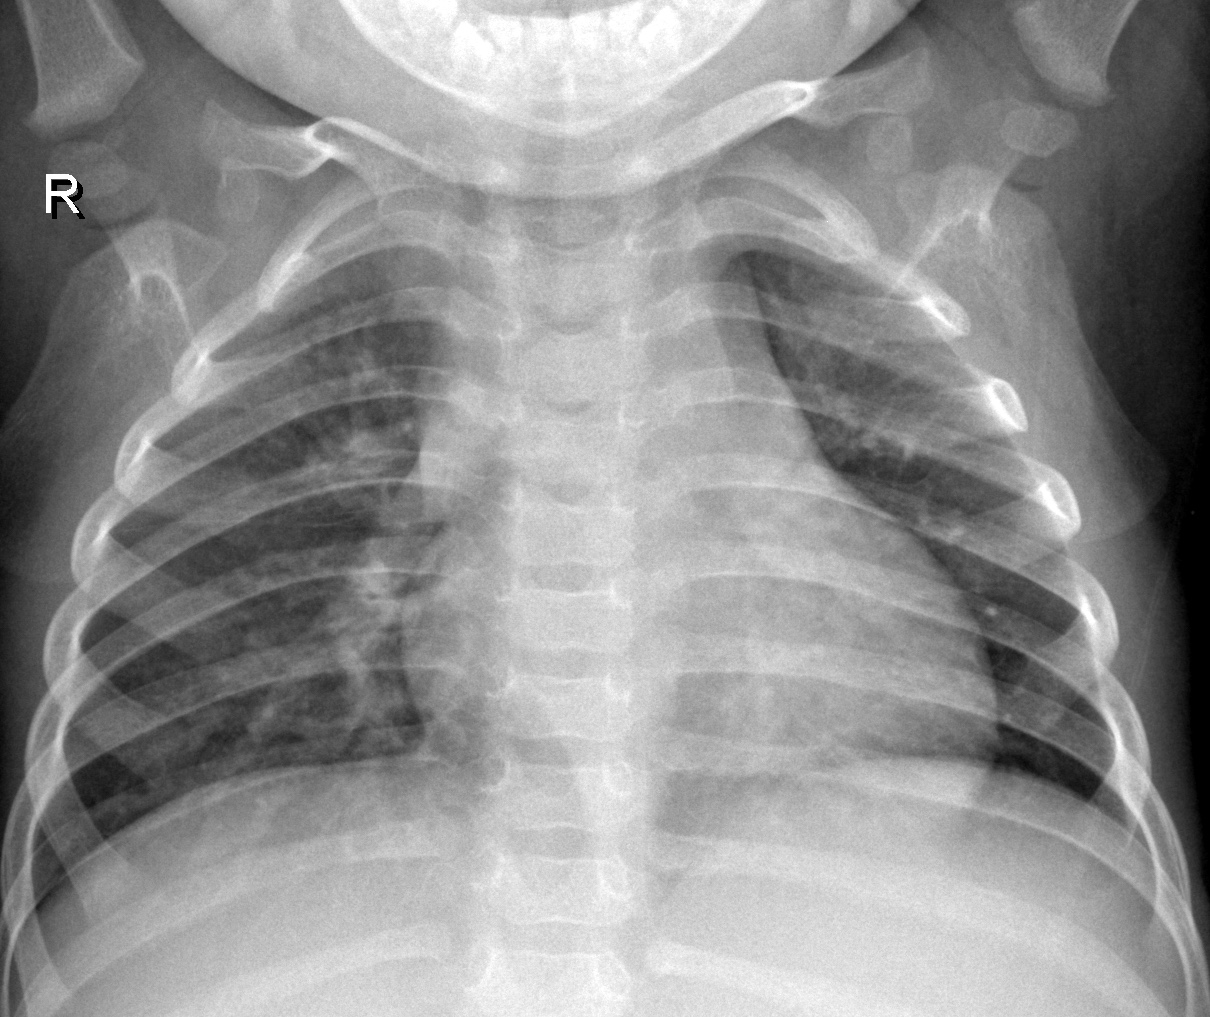

_____________
_____________


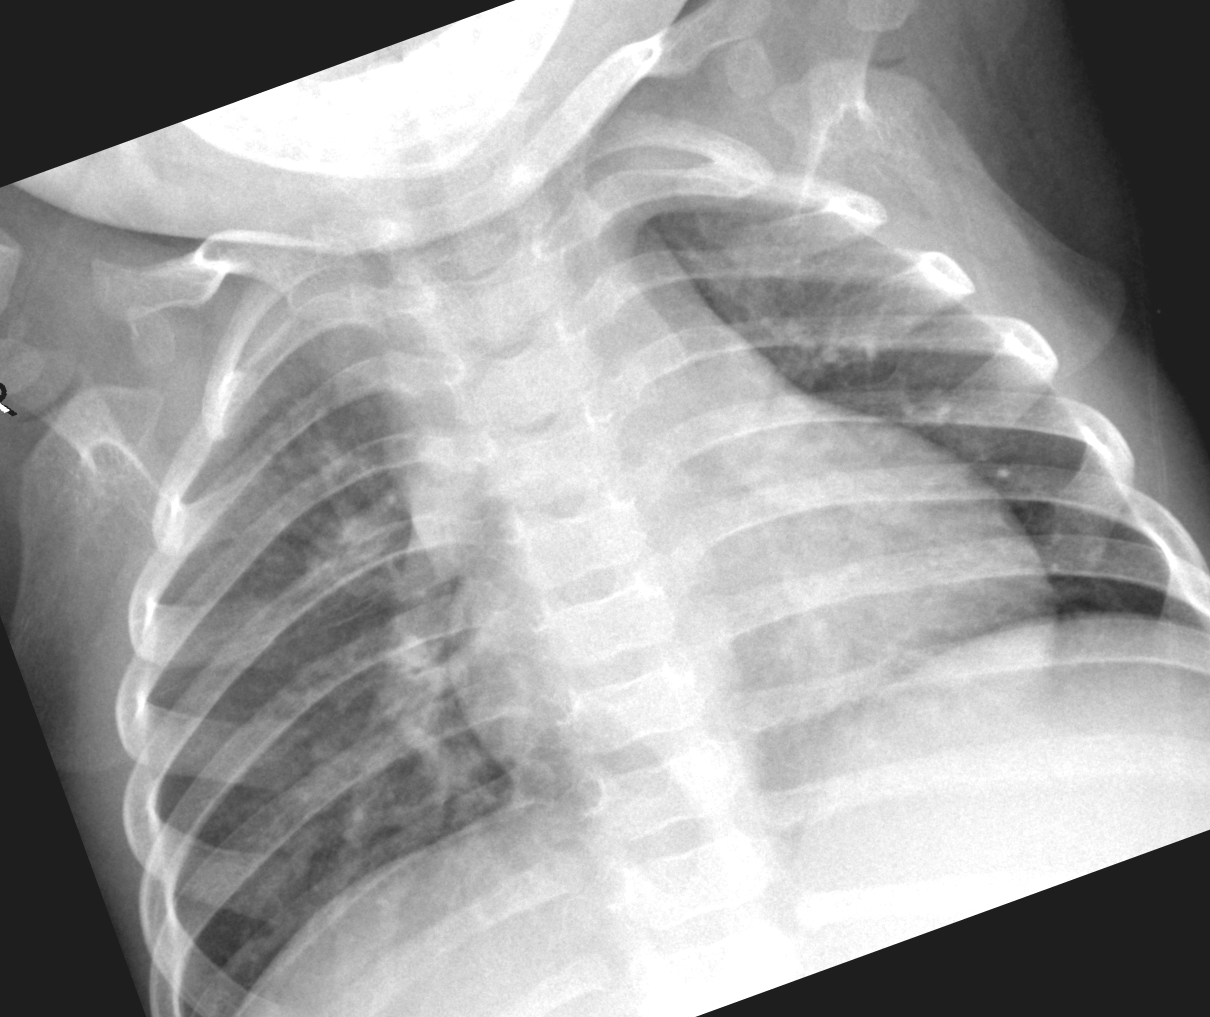

In [ ]:
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave
from google.colab.patches import cv2_imshow
import cv2
import imutils

#visulaize augmentaion results on 2 images
IM=NTrainList[0]
IM="/content/chest_xray/train/NORMAL/"+IM
img = cv2.imread(IM)
cv2_imshow(img)
# Use Flip code 1 to flip horizontally 
#img = cv2.flip(img, 1) 
#alpha = 1 # Contrast control (1.0-3.0)
#beta = 50 # Brightness control (0-100)
#img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
#print("_____________")
cv2_imshow(img)
#imsave(IM+'Aug1.jpeg', img)

img = imutils.rotate(img, 20)
alpha = 1 # Contrast control (1.0-3.0)
beta = 30 # Brightness control (0-100)
img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
print("_____________")
cv2_imshow(img)
#imsave(IM+'Aug2.jpeg', img)



In [ ]:
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave
import cv2
#Apply AUG for NORMAL class only
c=0
for IM in NTrainList:
  img = cv2.imread("/content/chest_xray/train/NORMAL/"+IM)
  if c%2==0: #using different 2 aug. based on index
    # Use Flip code 1 to flip horizontally 
    img = cv2.flip(img, 1) 
    alpha = 1 # Contrast control (1.0-3.0)
    beta = 50 # Brightness control (0-100)
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    imsave("/content/chest_xray/train/NORMAL/"+IM+'Aug1.jpeg', img)
  else:
    img = imutils.rotate(img, 20)
    alpha = 1 # Contrast control (1.0-3.0)
    beta = 30 # Brightness control (0-100)
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    imsave("/content/chest_xray/train/NORMAL/"+IM+'Aug2.jpeg', img)
  print(IM)
  print(c)
  c+=1

NORMAL2-IM-0873-0001.jpeg
0
NORMAL2-IM-0999-0001.jpeg
1
IM-0476-0001.jpeg
2
IM-0166-0001.jpeg
3
IM-0655-0001.jpeg
4
IM-0379-0001.jpeg
5
IM-0524-0001.jpeg
6
NORMAL2-IM-0472-0001.jpeg
7
NORMAL2-IM-1111-0001.jpeg
8
NORMAL2-IM-0454-0001.jpeg
9
IM-0228-0001.jpeg
10
NORMAL2-IM-1277-0001-0002.jpeg
11
NORMAL2-IM-0385-0001.jpeg
12
NORMAL2-IM-1073-0001.jpeg
13
IM-0145-0001.jpeg
14
NORMAL2-IM-0561-0001.jpeg
15
IM-0395-0001.jpeg
16
NORMAL2-IM-1086-0001.jpeg
17
NORMAL2-IM-0828-0001.jpeg
18
IM-0480-0001.jpeg
19
NORMAL2-IM-0458-0001.jpeg
20
IM-0644-0001.jpeg
21
NORMAL2-IM-1161-0001.jpeg
22
IM-0735-0001.jpeg
23
NORMAL2-IM-1103-0001-0001.jpeg
24
IM-0503-0001.jpeg
25
IM-0675-0001.jpeg
26
IM-0650-0001-0002.jpeg
27
IM-0178-0001.jpeg
28
NORMAL2-IM-1038-0001.jpeg
29
NORMAL2-IM-0564-0001.jpeg
30
IM-0248-0001.jpeg
31
NORMAL2-IM-1254-0001.jpeg
32
NORMAL2-IM-0503-0001.jpeg
33
NORMAL2-IM-1112-0001.jpeg
34
NORMAL2-IM-0965-0001.jpeg
35
IM-0543-0001.jpeg
36
NORMAL2-IM-1227-0001.jpeg
37
IM-0469-0001.jpeg
38
IM-0523-

In [ ]:
#AFTER AUG
import os
#TRAIN
PTrainList=os.listdir("/content/chest_xray/train/PNEUMONIA")
NTrainList=os.listdir("/content/chest_xray/train/NORMAL")
print("P",len(PTrainList))
print("N",len(NTrainList))

#VAL
PValList=os.listdir("/content/chest_xray/val/PNEUMONIA")
NValList=os.listdir("/content/chest_xray/val/NORMAL")
print("P",len(PValList))
print("N",len(NValList))

P 3875
N 2682
P 8
N 8


# **Data Preparation**

In [ ]:
import numpy as np
import os
import random
NTrainPath="/content/chest_xray/train/NORMAL"
PTrainPath="/content/chest_xray/train/PNEUMONIA"
TrainData=[]
for N in os.listdir(NTrainPath):
  TrainData.append(["/content/chest_xray/train/NORMAL/"+N,0]) #0 for normal
for P in os.listdir(PTrainPath):
  TrainData.append(["/content/chest_xray/train/PNEUMONIA/"+P,1]) #1 for pneumonia
print(len(TrainData))
print(TrainData[0])
print(TrainData[len(TrainData)-1])
#Shuffle data
random.shuffle(TrainData)
print("After Shuffle")
print(len(TrainData))
print(TrainData[0])
print(TrainData[len(TrainData)-1])
print(TrainData[1300])

6557
['/content/chest_xray/train/NORMAL/NORMAL2-IM-0662-0001.jpegAug1.jpeg', 0]
['/content/chest_xray/train/PNEUMONIA/person1214_bacteria_3166.jpeg', 1]
After Shuffle
6557
['/content/chest_xray/train/PNEUMONIA/person19_bacteria_60.jpeg', 1]
['/content/chest_xray/train/NORMAL/NORMAL2-IM-0414-0001.jpeg', 0]
['/content/chest_xray/train/PNEUMONIA/person806_virus_1439.jpeg', 1]


In [ ]:
import cv2
from keras.utils import to_categorical

# ValidationData
ValData=[]
Vlabels=[]
for img in os.listdir("/content/chest_xray/val/NORMAL"):
    img = cv2.imread("/content/chest_xray/val/NORMAL/"+img)  
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    ValData.append(img)
    Vlabels.append(label)
                      
for img in os.listdir("/content/chest_xray/val/PNEUMONIA"):
    img = cv2.imread("/content/chest_xray/val/PNEUMONIA/"+img)
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1: #if grayscale
        img = np.dstack([img, img, img]) #convert into 3 channels.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    ValData.append(img)
    Vlabels.append(label)
    
# Convert the list into numpy arrays
ValData = np.array(ValData)
Vlabels = np.array(Vlabels)

print(ValData.shape)
print(Vlabels.shape)

(16, 224, 224, 3)
(16, 2)


# **Data generator**

In [ ]:
def Tgenerator(data,batch_size):
    #c=0
    while True:
      for start in range(0, len(TrainData),batch_size):
          count = 0
          batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
          batch_labels = np.zeros((batch_size,2), dtype=np.float32)
          end = min(start + batch_size, len(TrainData))
          for i in range(start, end):
            img_name = data[i][0]
            label = data[i][1]
            #print(count)
            #print(label,img_name)
            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(img_name)
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img]) #convert to 3 channels.
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
            count+=1
          yield  batch_data, batch_labels

# **#Another metrices (percision_recall_F1_score)**

In [ ]:
from keras import backend as K
#define another metrices
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# **Building CNN Model**

In [ ]:
import glob
import h5py
import shutil
import imgaug as aug
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import imgaug.augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras.applications import VGG19
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, SGD
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
from keras.layers import Input
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from tensorflow.python.keras import regularizers
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping


In [ ]:

input_tensor = Input(shape=(224, 224, 3))
vgg_conv = VGG19(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)
# Freeze the layers except the last 2 layers
for layer in vgg_conv.layers[:-2]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
# Add the vgg convolutional base model
model.add(vgg_conv)
model.add(layers.Dropout(0.5))
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same')) 
#model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same')) #best without that 85
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


80142336/80134624 [==============================] - 0s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f6150e28080> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f619e968eb8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6150e3cba8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f61505fc1d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f61505fcc50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f615059c780> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f615059cb70> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f61505a6710> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f61505ac588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f61505ac9b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f61505b7588> Fals

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
separable_conv2d_11 (Separab (None, 7, 7, 128)         70272     
_________________________________________________________________
separable_conv2d_12 (Separab (None, 7, 7, 128)         17664     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
separable_conv2d_13 (Separab (None, 3, 3, 256)         34176     
_________________________________________________________________
batch_normalization_4 (Batch (None, 3, 3, 256)        

In [ ]:
opt = optimizers.Adam(lr=0.0001, decay=1e-5)
es = EarlyStopping(patience=5)
chkpt = ModelCheckpoint(filepath='BestModel', save_best_only=True, save_weights_only=True)
model.compile(loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m],optimizer=opt) 

In [ ]:
batch_size = 16

# Get a train data generator
train_data_gen = Tgenerator(TrainData,batch_size)

# Define the number of training steps
steps = len(TrainData)//batch_size
print(steps)

409


# **Fitting the model**

In [ ]:
# Fit the model
history = model.fit_generator(train_data_gen, epochs=10, steps_per_epoch=steps,
                               validation_data=(ValData, Vlabels),callbacks=[es, chkpt],
                               class_weight={0:1.0, 1:0.4}) #save the best one

Epoch 1/10
409/409 [==============================] - 127s 311ms/step - loss: 0.1715 - acc: 0.8079 - f1_m: 0.8079 - precision_m: 0.8079 - recall_m: 0.8079 - val_loss: 0.7876 - val_acc: 0.5000 - val_f1_m: 0.5000 - val_precision_m: 0.5000 - val_recall_m: 0.5000
Epoch 2/10
409/409 [==============================] - 127s 310ms/step - loss: 0.0500 - acc: 0.9645 - f1_m: 0.9643 - precision_m: 0.9641 - recall_m: 0.9645 - val_loss: 0.6742 - val_acc: 0.8125 - val_f1_m: 0.8125 - val_precision_m: 0.8125 - val_recall_m: 0.8125
Epoch 3/10
409/409 [==============================] - 126s 309ms/step - loss: 0.0340 - acc: 0.9765 - f1_m: 0.9767 - precision_m: 0.9765 - recall_m: 0.9769 - val_loss: 0.5916 - val_acc: 0.8125 - val_f1_m: 0.8125 - val_precision_m: 0.8125 - val_recall_m: 0.8125
Epoch 4/10
409/409 [==============================] - 126s 307ms/step - loss: 0.0278 - acc: 0.9814 - f1_m: 0.9816 - precision_m: 0.9814 - recall_m: 0.9818 - val_loss: 0.0370 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_pre

# **Accuracy and Loss diagrams through the full training process**

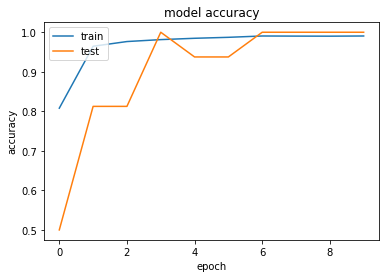

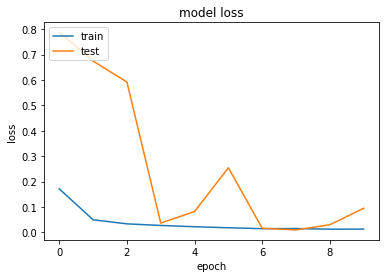

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Testing**

In [ ]:
# Preparing test data

test_data = []
test_labels = []

for img in os.listdir("/content/chest_xray/test/NORMAL"):
    img = cv2.imread("/content/chest_xray/test/NORMAL/"+img)
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
                      
for img in os.listdir("/content/chest_xray/test/PNEUMONIA"):
    img = cv2.imread("/content/chest_xray/test/PNEUMONIA/"+img)
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 224, 224, 3)
Total number of labels: (624, 2)


In [ ]:
model.load_weights("/content/BestModel/BestModel") #loading best model weights

In [ ]:
#Predictions of the test data
preds = model.predict(test_data, batch_size=16)
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(test_labels, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)

(624,)
(624,)


# **Evaluation**

In [ ]:
#Total Test Accuracy
Acc=0
for i in range(len(preds)):
  if preds[i]==orig_test_labels[i]:
    Acc+=1
print(Acc/624)

0.8493589743589743


<Figure size 432x288 with 0 Axes>

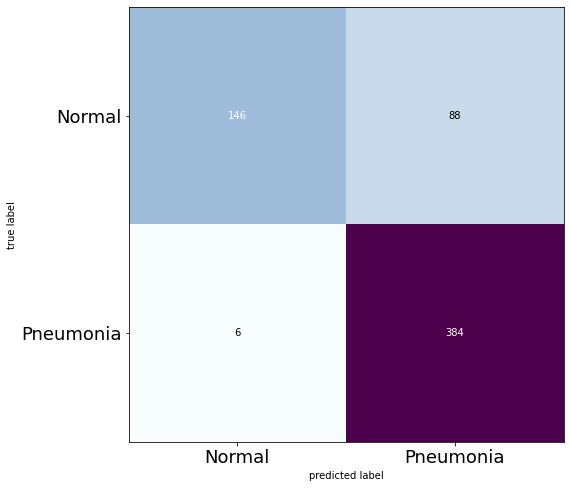

In [ ]:
#Confusion Matrix
cm  = confusion_matrix(orig_test_labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.BuPu)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=18)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=18)
plt.show()

PredictedLabel is:  Normal
TrueLabel is: Normal


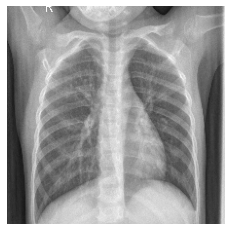

In [ ]:
L=["Normal","Pneumonia"]
img = cv2.imread("/content/chest_xray/test/NORMAL/IM-0009-0001.jpeg")
img = cv2.resize(img, (224,224))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)/255.
label = to_categorical(0, num_classes=2)
PredictedLabel = np.argmax(model.predict(img))
#print(PredictedLabel)
print("PredictedLabel is: ",L[PredictedLabel])
print("TrueLabel is:",L[np.argmax(label)])

PredictedLabel is:  Pneumonia
TrueLabel is: Pneumonia


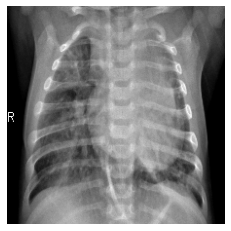

In [ ]:
img = cv2.imread("/content/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")
img = cv2.resize(img, (224,224))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)/255.
label = to_categorical(1, num_classes=2)
PredictedLabel = np.argmax(model.predict(img))
#print(PredictedLabel)
print("PredictedLabel is: ",L[PredictedLabel])
print("TrueLabel is:",L[np.argmax(label)])

In [ ]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.98
Precision of the model is 0.81
